# Determining Potential Food Allergens Without an Elimination Diet

## Importing the Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Obtaining the .csv File of the Patient and Saving the Data

In [2]:
opened_file = open('D://Q//Work//Personal Python Projects//AllergenProfile1.csv')
from csv import reader
read_file = reader(opened_file)
profile1 = list(read_file)
profile1_header = profile1[0]
profile1 = profile1[1:]

## Initializing Each Variable

In [3]:
# initializing the day variable
day = 0

# initializing the allergen variables
milk_count = 0
egg_count = 0
peanut_count = 0
treenut_count = 0
sesame_count = 0
soy_count = 0
fish_count = 0
shellfish_count = 0
wheat_count = 0

# initializing allergen data lists
milk_sev_total = []
egg_sev_total = []
peanut_sev_total = []

# initializing the symptom variables
itching = 0
puffy_eyes = 0
eczema = 0
hives = 0
swelling = 0
trouble_breathing = 0
abdominal_pain = 0
bowel_movement = 0
nausea = 0
dizziness = 0
headache = 0
anxiety = 0

# initializing the sum of all symptom severity levels
symptom_severity_total = 0

# initializing arrays for the number of meals that contain a given allergen each day. These arrays are used for linear regression.
milk_x = np.array([])
egg_x = np.array([])
peanut_x = np.array([])
treenut_x = np.array([])
sesame_x = np.array([])
soy_x = np.array([])
fish_x = np.array([])
shellfish_x = np.array([])
wheat_x = np.array([])

allergen_x = np.array([])

# initializing arrays for the each symptom each day. These arrays are used for linear regression.
itching_y = np.array([])
puffy_eyes_y = np.array([])
eczema_y = np.array([])
hives_y = np.array([])
swelling_y = np.array([])
trouble_breathing_y = np.array([])
abdominal_pain_y = np.array([])
bowel_movement_y = np.array([])
nausea_y = np.array([])
dizziness_y = np.array([])
headache_y = np.array([])
anxiety_y = np.array([])

# initializing an array of the total symptom severity each day. This array is used for linear regression.
severity_y = np.array([])

# initializing colors for each allergen
milk_color = 'blue'
egg_color = 'yellow'
peanut_color = 'orange'
treenut_color = 'green'
sesame_color = 'navy'
soy_color = 'magenta'
fish_color = 'aqua'
shellfish_color = 'lime'
wheat_color = 'red'

# initializing the colors for each symptom
itching_color = 'blue'
puffy_eyes_color = 'yellow'
eczema_color = 'orange'
hives_color = 'green'
swelling_color = 'navy'
trouble_breathing_color = 'magenta'
abdominal_pain_color = 'aqua'
bowel_movement_color = 'lime'
nausea_color = "red"
dizziness_color = "y"
headache_color = "darkviolet"
anxiety_color = "brown"

## Plotting the Patient's Daily Allergen Info (All Allergens, Average Symptom Severity)

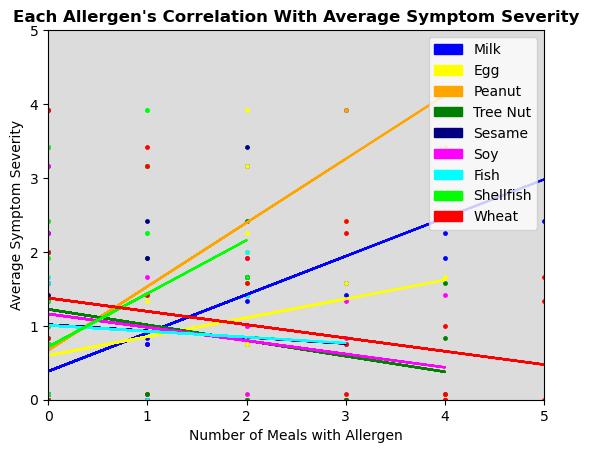

In [4]:
# This code set up the labels in the color legend on the right side of the plot.
# This code also sets the background color to a light gray and labels the axes & plot title. x-limit and y-limit are 5
fig, ax = plt.subplots()
milk_patch = mpatches.Patch(color = milk_color, label = 'Milk')
egg_patch = mpatches.Patch(color = egg_color, label = 'Egg')
peanut_patch = mpatches.Patch(color = peanut_color, label = 'Peanut')
treenut_patch = mpatches.Patch(color = treenut_color, label = 'Tree Nut')
sesame_patch = mpatches.Patch(color = sesame_color, label = 'Sesame')
soy_patch = mpatches.Patch(color = soy_color, label = 'Soy')
fish_patch = mpatches.Patch(color = fish_color, label = 'Fish')
shellfish_patch = mpatches.Patch(color = shellfish_color, label = 'Shellfish')
wheat_patch = mpatches.Patch(color = wheat_color, label = 'Wheat')
ax.legend(handles = [milk_patch, egg_patch, peanut_patch, treenut_patch, sesame_patch, soy_patch, fish_patch, shellfish_patch, wheat_patch])
ax.set_facecolor("gainsboro")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Each Allergen\'s Correlation With Average Symptom Severity', fontweight='bold')
plt.xlabel('Number of Meals with Allergen')
plt.ylabel('Average Symptom Severity')

# This for-loop goes through each row in the .csv file. Each row represents the data of that day.
for row in profile1:
    # Each item in this .csv file is a string. This for-loop turns any numerical data into an int type.
    index = 0
    for item in row:
        if type(item) != int and item.isnumeric():
            item = int(item)
            row[index] = item
        index += 1
    
    # setting all of the variables to the data in the current row  
    day = row[0]
    milk_count = row[2]
    egg_count = row[3]
    peanut_count = row[4]
    treenut_count = row[5]
    sesame_count = row[6]
    soy_count = row[7]
    fish_count = row[8]
    shellfish_count = row[9]
    wheat_count = row[10]
    itching = row[12]
    puffy_eyes = row[13]
    eczema = row[14]
    hives = row[15]
    swelling = row[16]
    trouble_breathing = row[17]
    abdominal_pain = row[18]
    bowel_movement = row[19]
    nausea = row[20]
    dizziness = row[21]
    headache = row[22]
    anxiety = row[23]
     
    # Each symptom has a severity minimum level of 0 and a severity maximum level of 5.
    # This line sets the severity average to the sum of all symptom severities.
    symptom_severity_average = sum(row[12:24]) / len(row[12:24])
    
    # This is the code that actually plots the day's data on the scatterplot.
    # The x-coordinate is the day's number of meals that contain the given allergen.
    # The y-coordinate is the day's average symptom severity.
    # Each allergen is plotted as it's given color, which was initialized in the initialization cell. Size of dots are 6.
    plt.scatter(milk_count, symptom_severity_average, c = milk_color, s = 6)
    plt.scatter(egg_count, symptom_severity_average, c = egg_color, s = 6)
    plt.scatter(peanut_count, symptom_severity_average, c = peanut_color, s = 6)
    plt.scatter(treenut_count, symptom_severity_average, c = treenut_color, s = 6)
    plt.scatter(sesame_count, symptom_severity_average, c = sesame_color, s = 6)
    plt.scatter(soy_count, symptom_severity_average, c = soy_color, s = 6)
    plt.scatter(fish_count, symptom_severity_average, c = fish_color, s = 6)
    plt.scatter(shellfish_count, symptom_severity_average, c = shellfish_color, s = 6)
    plt.scatter(wheat_count, symptom_severity_average, c = wheat_color, s = 6)
    
    # This code appends the day's number of meals that contain each allergen to that allergen's respected array.
    milk_x = np.append(milk_x, milk_count)
    egg_x = np.append(egg_x, egg_count)
    peanut_x = np.append(peanut_x, peanut_count)
    treenut_x = np.append(treenut_x, treenut_count)
    sesame_x = np.append(sesame_x, sesame_count)
    soy_x = np.append(soy_x, soy_count)
    fish_x = np.append(fish_x, fish_count)
    shellfish_x = np.append(shellfish_x, shellfish_count)
    wheat_x = np.append(wheat_x, wheat_count)
    
    # This line appends the day's average symptom severity to the symptom severity array.
    severity_y = np.append(severity_y, symptom_severity_average)
    
    # This is the end of the loop that goes through each day.


## Linear Regression Section

# This code finds the regression line for each allergen.
# It then adds the line to the scatterplot in the allergen's respective color.
a, b = np.polyfit(milk_x, severity_y, 1)
plt.plot(milk_x, a * milk_x + b, c = milk_color)
milk_slope = a

a, b = np.polyfit(egg_x, severity_y, 1)
plt.plot(egg_x, a * egg_x + b, c = egg_color)
egg_slope = a

a, b = np.polyfit(peanut_x, severity_y, 1)
plt.plot(peanut_x, a * peanut_x + b, c = peanut_color)
peanut_slope = a

a, b = np.polyfit(treenut_x, severity_y, 1)
plt.plot(treenut_x, a * treenut_x + b, c = treenut_color)
treenut_slope = a

a, b = np.polyfit(sesame_x, severity_y, 1)
plt.plot(sesame_x, a * sesame_x + b, c = sesame_color)
sesame_slope = a

a, b = np.polyfit(soy_x, severity_y, 1)
plt.plot(soy_x, a * soy_x + b, c = soy_color)
soy_slope = a

a, b = np.polyfit(fish_x, severity_y, 1)
plt.plot(fish_x, a * fish_x + b, c = fish_color)
fish_slope = a

a, b = np.polyfit(shellfish_x, severity_y, 1)
plt.plot(shellfish_x, a * shellfish_x + b, c = shellfish_color)
shellfish_slope = a

a, b = np.polyfit(wheat_x, severity_y, 1)
plt.plot(wheat_x, a * wheat_x + b, c = wheat_color)
wheat_slope = a

# The following code simply resets the arrays that were used.
milk_x = np.array([])
egg_x = np.array([])
peanut_x = np.array([])
treenut_x = np.array([])
sesame_x = np.array([])
soy_x = np.array([])
fish_x = np.array([])
shellfish_x = np.array([])
wheat_x = np.array([])

In [5]:
def plotSymptoms(allergen_type):
    
    # initializing arrays for the each symptom each day. These arrays are used for linear regression.
    itching_y = np.array([])
    puffy_eyes_y = np.array([])
    eczema_y = np.array([])
    hives_y = np.array([])
    swelling_y = np.array([])
    trouble_breathing_y = np.array([])
    abdominal_pain_y = np.array([])
    bowel_movement_y = np.array([])
    nausea_y = np.array([])
    dizziness_y = np.array([])
    headache_y = np.array([])
    anxiety_y = np.array([])
    allergen_x = np.array([])

    # This code set up the labels in the color legend on the right side of the plot.
    # This code also sets the background color to a light gray and labels the axes & plot title. x-limit and y-limit are 5
    fig, ax = plt.subplots()
    itching_patch = mpatches.Patch(color = itching_color, label = 'Itching')
    puffy_eyes_patch = mpatches.Patch(color = puffy_eyes_color, label = 'Puffy Eyes')
    eczema_patch = mpatches.Patch(color = eczema_color, label = 'Eczema')
    hives_patch = mpatches.Patch(color = hives_color, label = 'Hives')
    swelling_patch = mpatches.Patch(color = swelling_color, label = 'Swelling')
    trouble_breathing_patch = mpatches.Patch(color = trouble_breathing_color, label = 'Breathing Trouble')
    abdominal_pain_patch = mpatches.Patch(color = abdominal_pain_color, label = 'Abdominal Pain')
    bowel_movement_patch = mpatches.Patch(color = bowel_movement_color, label = 'Bowel Movement')
    nausea_patch = mpatches.Patch(color = nausea_color, label = 'Nausea')
    dizziness_patch = mpatches.Patch(color = dizziness_color, label = 'Dizziness')
    headache_patch = mpatches.Patch(color = headache_color, label = 'Headache')
    anxiety_patch = mpatches.Patch(color = anxiety_color, label = 'Anxiety')
    ax.legend(handles = [itching_patch, puffy_eyes_patch, eczema_patch, hives_patch, swelling_patch,
                        trouble_breathing_patch, abdominal_pain_patch, bowel_movement_patch, nausea_patch,
                        dizziness_patch, headache_patch, anxiety_patch])
    ax.set_facecolor("gainsboro")
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title(allergen_type + '\'s Correlation With Each Symptom', fontweight='bold')
    plt.xlabel('Number of Meals with ' + allergen_type + ' Allergen')
    plt.ylabel('Symptom Severity')

    # This for-loop goes through each row in the .csv file. Each row represents the data of that day.
    for row in profile1:
        # Each item in this .csv file is a string. This for-loop turns any numerical data into an int type.
        index = 0
        for item in row:
            if type(item) != int and item.isnumeric():
                item = int(item)
                row[index] = item
            index += 1
    
        # setting all of the variables to the data in the current row  
        day = row[0]
        milk_count = row[2]
        egg_count = row[3]
        peanut_count = row[4]
        treenut_count = row[5]
        sesame_count = row[6]
        soy_count = row[7]
        fish_count = row[8]
        shellfish_count = row[9]
        wheat_count = row[10]
        itching = row[12]
        puffy_eyes = row[13]
        eczema = row[14]
        hives = row[15]
        swelling = row[16]
        trouble_breathing = row[17]
        abdominal_pain = row[18]
        bowel_movement = row[19]
        nausea = row[20]
        dizziness = row[21]
        headache = row[22]
        anxiety = row[23]
        
        # This code checks to see what allergen type is taken in as a function argument.
        # It then assigns the daily number of meals with the allergen to a variable.
        if(allergen_type == "Milk"):
            allergen_count = milk_count
        elif(allergen_type == "Egg"):
            allergen_count = egg_count
        elif(allergen_type == "Peanut"):
            allergen_count = peanut_count
        elif(allergen_type == "Tree Nut"):
            allergen_count = treenut_count
        elif(allergen_type == "Sesame"):
            allergen_count = sesame_count
        elif(allergen_type == "Soy"):
            allergen_count = soy_count
        elif(allergen_type == "Fish"):
            allergen_count = fish_count
        elif(allergen_type == "Shellfish"):
            allergen_count = shellfish_count
        elif(allergen_type == "Wheat"):
            allergen_count = wheat_count
        else:
            return "An invalid allergen name was entered."
    
        # This is the code that actually plots the allergens's data on the scatterplot.
        # The x-coordinate is the day's number of meals that contain the given allergen.
        # The y-coordinate is each symptom's severity of each day.
        # Each symptom is plotted as it's given color, which was initialized in the initialization cell. Size of dots are 6.
        plt.scatter(allergen_count, itching, c = itching_color, s = 6)
        plt.scatter(allergen_count, puffy_eyes, c = puffy_eyes_color, s = 6)
        plt.scatter(allergen_count, eczema, c = eczema_color, s = 6)
        plt.scatter(allergen_count, hives, c = hives_color, s = 6)
        plt.scatter(allergen_count, swelling, c = swelling_color, s = 6)
        plt.scatter(allergen_count, trouble_breathing, c = trouble_breathing_color, s = 6)
        plt.scatter(allergen_count, abdominal_pain, c = abdominal_pain_color, s = 6)
        plt.scatter(allergen_count, bowel_movement, c = bowel_movement_color, s = 6)
        plt.scatter(allergen_count, nausea, c = nausea_color, s = 6)
        plt.scatter(allergen_count, dizziness, c = dizziness_color, s = 6)
        plt.scatter(allergen_count, headache, c = headache_color, s = 6)
        plt.scatter(allergen_count, anxiety, c = anxiety_color, s = 6)

        # This code appends the day's symptom severities to that symptoms's respected array.
        itching_y = np.append(itching_y, itching)
        puffy_eyes_y = np.append(puffy_eyes_y, puffy_eyes)
        eczema_y = np.append(eczema_y, eczema)
        hives_y = np.append(hives_y, hives)
        swelling_y = np.append(swelling_y, swelling)
        trouble_breathing_y = np.append(trouble_breathing_y, trouble_breathing)
        abdominal_pain_y = np.append(abdominal_pain_y, abdominal_pain)
        bowel_movement_y = np.append(bowel_movement_y, bowel_movement)
        nausea_y = np.append(nausea_y, nausea)
        dizziness_y = np.append(dizziness_y, dizziness)
        headache_y = np.append(headache_y, headache)
        anxiety_y = np.append(anxiety_y, anxiety)

        # This line appends the day's number of meals with the given allergen to the respected allergen's array.
        allergen_x = np.append(allergen_x, allergen_count)

        # This is the end of the loop that goes through each day.


    ## Linear Regression Section

    # This code finds the regression line for each symptom of the given allergen.
    # It then adds the line to the scatterplot in the symptoms's respective color.
    a, b = np.polyfit(allergen_x, itching_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = itching_color)
    itching_slope = a

    a, b = np.polyfit(allergen_x, puffy_eyes_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = puffy_eyes_color)
    puffy_eyes_slope = a

    a, b = np.polyfit(allergen_x, eczema_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = eczema_color)
    eczema_slope = a

    a, b = np.polyfit(allergen_x, hives_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = hives_color)
    hives_slope = a

    a, b = np.polyfit(allergen_x, swelling_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = swelling_color)
    swelling_slope = a

    a, b = np.polyfit(allergen_x, trouble_breathing_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = trouble_breathing_color)
    trouble_breathing_slope = a

    a, b = np.polyfit(allergen_x, abdominal_pain_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = abdominal_pain_color)
    abdominal_pain_slope = a

    a, b = np.polyfit(allergen_x, bowel_movement_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = bowel_movement_color)
    bowel_movement_slope = a

    a, b = np.polyfit(allergen_x, nausea_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = nausea_color)
    nausea_slope = a

    a, b = np.polyfit(allergen_x, dizziness_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = dizziness_color)
    dizziness_slope = a

    a, b = np.polyfit(allergen_x, headache_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = headache_color)
    headache_slope = a

    a, b = np.polyfit(allergen_x, anxiety_y, 1)
    plt.plot(allergen_x, a * allergen_x + b, c = anxiety_color)
    anxiety_slope = a

    # The following code simply resets the arrays that were used.
    allergen_x = np.array([])
    itching_y = np.array([])
    puffy_eyes_y = np.array([])
    eczema_y = np.array([])
    hives_y = np.array([])
    swelling_y = np.array([])
    trouble_breathing_y = np.array([])
    abdominal_pain_y = np.array([])
    bowel_movement_y = np.array([])
    nausea_y = np.array([])
    dizziness_y = np.array([])
    headache_y = np.array([])
    anxiety_y = np.array([])

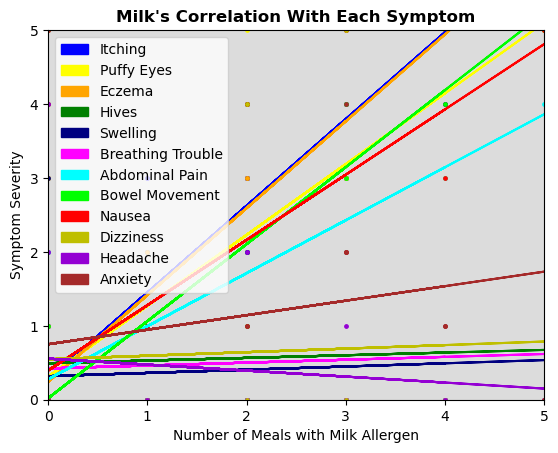

In [6]:
if milk_slope > 0.25:
    plotSymptoms("Milk")

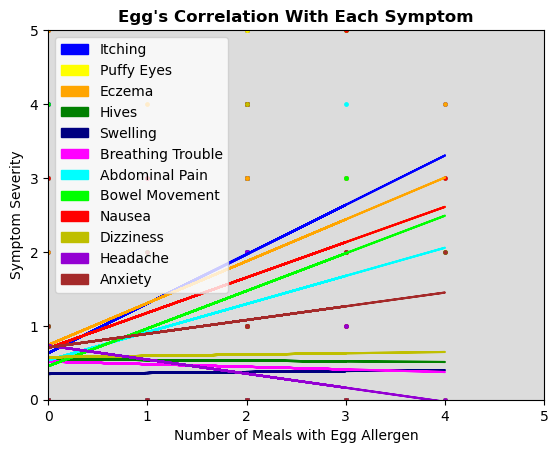

In [7]:
if egg_slope > 0.25:
    plotSymptoms("Egg")

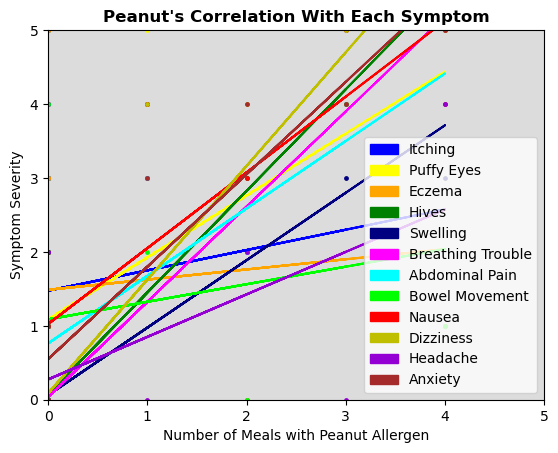

In [8]:
if peanut_slope > 0.25:
    plotSymptoms("Peanut")

In [9]:
if treenut_slope > 0.25:
    plotSymptoms("Tree Nut")

In [10]:
if sesame_slope > 0.25:
    plotSymptoms("Sesame")

In [11]:
if soy_slope > 0.25:
    plotSymptoms("Soy")

In [12]:
if fish_slope > 0.25:
    plotSymptoms("Fish")

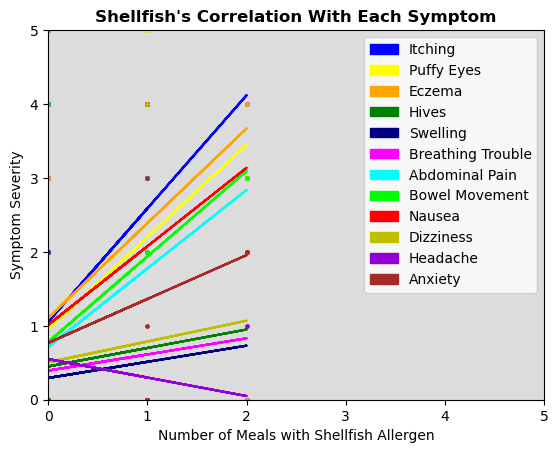

In [13]:
if shellfish_slope > 0.25:
    plotSymptoms("Shellfish")

In [14]:
if wheat_slope > 0.25:
    plotSymptoms("Wheat")